# Training A Logistic Regression Model For Analysis  

In [33]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
print(os.getcwd())

c:\Users\erict\Downloads\Courses\Spring 2025\INST414\414 project\models


In [ ]:
df = pd.read_csv('../data/processed/Mental_Health_Dataset_Encoded.csv') # load the encoded dataset for model training
pd.set_option('display.max_columns', None)
df.head()

,Gender,Country,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,care_options,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,Social_Weakness_No,Social_Weakness_Yes,mental_health_interview_No,mental_health_interview_Yes
0,0,United States,0,0,1,1,2,0,2,1,0,0,1,1,0,0,0,0,1,1,0
1,0,United States,0,1,1,1,2,0,2,1,0,0,0,1,0,0,0,0,1,1,0
2,0,United States,0,1,1,1,2,0,2,1,0,0,2,1,0,0,0,0,1,1,0
3,0,United States,0,1,1,1,2,0,2,1,0,0,2,1,0,0,0,0,1,0,0
4,0,United States,0,1,1,1,2,0,2,1,0,0,2,1,0,0,0,0,1,1,0


In [ ]:
# logisitc regression to "predict" if a person will receive treatment or not
X = df.drop(columns=['treatment', 'Country'], axis=1)
y = df['treatment']

X = sm.add_constant(X) # add a constant to the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=414)
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train) # fit the model to the training data

#evaluate the model
y_pred = model.predict(X_test) # make predictions on the test data
print(classification_report(y_test, y_pred)) # print the classification report
# remember, 0 is no treatment, 1 is treatment

              precision    recall  f1-score   support

           0       0.71      0.65      0.68     28937
           1       0.69      0.74      0.71     29536

    accuracy                           0.70     58473
   macro avg       0.70      0.70      0.70     58473
weighted avg       0.70      0.70      0.70     58473



In [18]:
# feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

                        Feature  Coefficient
3                family_history     1.489103
19  mental_health_interview_Yes     0.747195
11                 care_options     0.565808
18   mental_health_interview_No     0.490123
2                 self_employed     0.297440
12         Occupation_Corporate     0.008454
9              Coping_Struggles     0.005472
14            Occupation_Others     0.004442
10                Work_Interest     0.002322
16           Social_Weakness_No     0.002210
15           Occupation_Student     0.001344
5                Growing_Stress     0.001079
6                Changes_Habits     0.000957
4                  Days_Indoors    -0.000100
8                   Mood_Swings    -0.000422
7         Mental_Health_History    -0.000530
17          Social_Weakness_Yes    -0.001574
13         Occupation_Housewife    -0.002643
0                         const    -0.518882
1                        Gender    -0.575277


In [ ]:
# This time, we remake the model with the most important features
important_features = ['family_history', 'mental_health_interview_Yes', 'mental_health_interview_No', 'care_options',
                      'self_employed', 'Gender']
X_important = df[important_features]
y_important = df['treatment']
X_important = sm.add_constant(X_important) # add a constant to the model
X_train_important, X_test_important, y_train_important, y_test_important = train_test_split(X_important, y_important, 
                                                                                            test_size=0.2, random_state=414)
# introduce elastic net regularization to the model
model_important = LogisticRegression(penalty='elasticnet', solver = 'saga', l1_ratio=0.12, max_iter=1000) 
model_important.fit(X_train_important, y_train_important) # fit the model to the training data

# evaluate the model
y_pred_important = model_important.predict(X_test_important) # make predictions on the test data
print(classification_report(y_test_important, y_pred_important)) # print the classification report

              precision    recall  f1-score   support

           0       0.71      0.65      0.68     28937
           1       0.69      0.74      0.71     29536

    accuracy                           0.70     58473
   macro avg       0.70      0.70      0.70     58473
weighted avg       0.70      0.70      0.70     58473



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

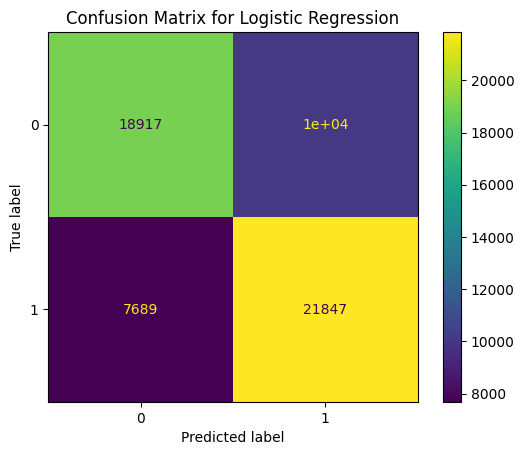

In [ ]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model_important, X_test_important, y_test_important) 
plt.title('Confusion Matrix for Logistic Regression')

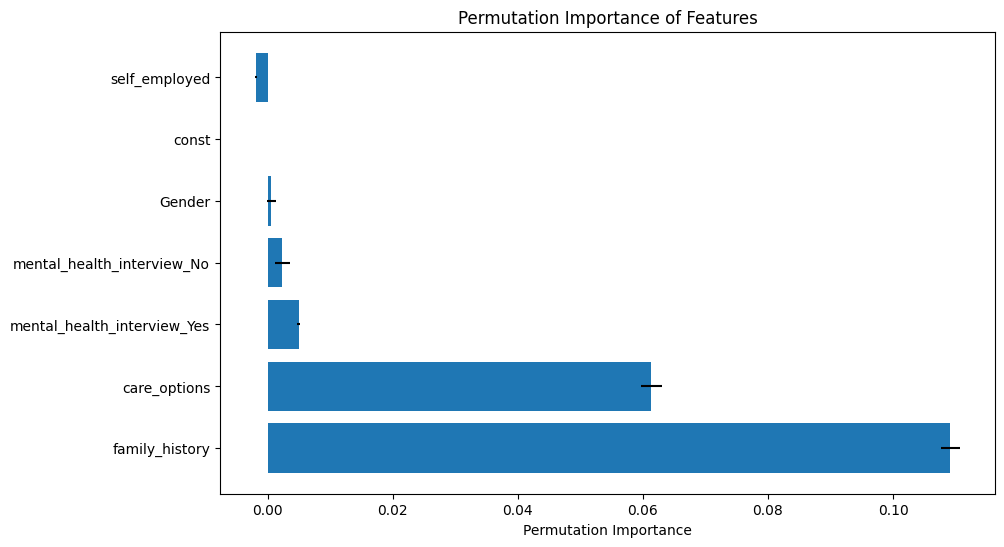

In [43]:
from sklearn.inspection import permutation_importance
results = permutation_importance(model_important, X_test_important, y_test_important, scoring='accuracy')
# plot the shape values
sorted_idx = results.importances_mean.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.barh(X_important.columns[sorted_idx], results.importances_mean[sorted_idx], xerr=results.importances_std[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance of Features")
plt.show()